<a href="https://colab.research.google.com/github/team0243/DWDM21/blob/main/Chap8_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#K-means

##Generate Data

In [5]:
from sklearn.datasets import make_blobs

In [6]:
X, y = make_blobs(n_samples=500, centers=3, n_features=2, random_state=6)

##Explore Data

In [7]:
X.shape

(500, 2)

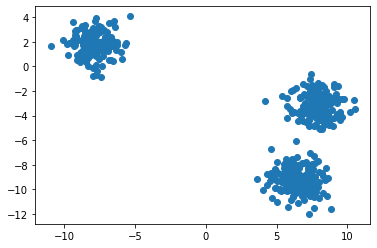

In [8]:
from matplotlib import pyplot as plt
plt.scatter(X[:,0],X[:,1])

##Clustering

###import

In [9]:
from sklearn.cluster import KMeans

###Define

In [10]:
kmeans = KMeans(n_clusters=2, random_state=6)

###Fit-Predict

In [11]:
y_clust = kmeans.fit_predict(X)

In [12]:
y_clust

array([1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,

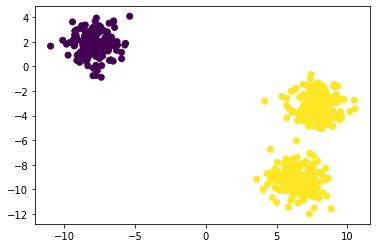

In [13]:
plt.scatter(X[:,0],X[:,1],c=y_clust)

3 clusters

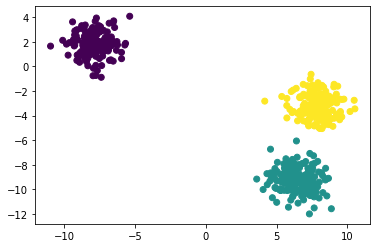

In [14]:
#define
kmeans = KMeans(n_clusters=3, random_state=6)
#fit-predict
y_clust = kmeans.fit_predict(X)
#plot
plt.scatter(X[:,0],X[:,1],c=y_clust)

4 clusters

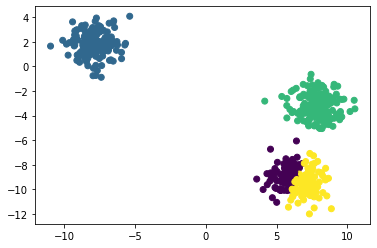

In [15]:
#define
kmeans = KMeans(n_clusters=4, random_state=6)
#fit-predict
y_clust = kmeans.fit_predict(X)
#plot
plt.scatter(X[:,0],X[:,1],c=y_clust)

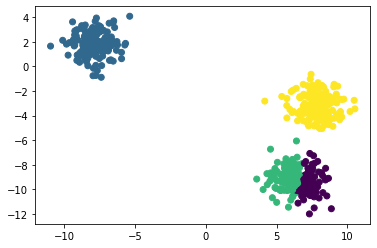

In [16]:
#define
kmeans = KMeans(n_clusters=4, init='random')
#fit-predict
y_clust = kmeans.fit_predict(X)
#plot
plt.scatter(X[:,0],X[:,1],c=y_clust)

5 clusters

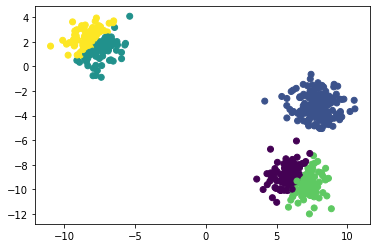

In [17]:
#define
kmeans = KMeans(n_clusters=5, random_state=14, init='random')
#fit-predict
y_clust = kmeans.fit_predict(X)
#plot
plt.scatter(X[:,0],X[:,1],c=y_clust)

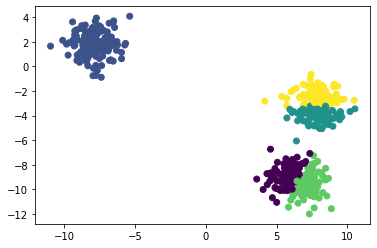

In [18]:
#define
kmeans = KMeans(n_clusters=5, random_state=6, init='random')
#fit-predict
y_clust = kmeans.fit_predict(X)
#plot
plt.scatter(X[:,0],X[:,1],c=y_clust)

#Exanple Application (Color Quantization)

In [29]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:
import cv2
import os

In [34]:
img = cv2.imread('/content/0005.jpg')

In [35]:
img.shape

(800, 580, 3)

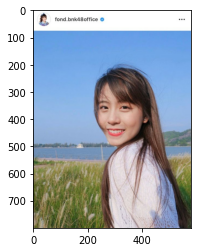

In [36]:
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(RGB_img)

###นับจำนวนสี

In [37]:
import numpy as np

In [38]:
np.unique(np.reshape(RGB_img, (RGB_img.shape[0]*RGB_img.shape[1],3)),axis=0).shape

(90485, 3)

###จัดกลุ่มให้เหลือ 16 สี

In [40]:
myquantize = KMeans(n_clusters=16, random_state=6)

###แปลงข้อมูลให้อยู่ในรูป row-column

In [41]:
img_row = np.reshape(RGB_img, (RGB_img.shape[0]*RGB_img.shape[1],3))
img_row.shape

(464000, 3)

In [42]:
final_color = myquantize.fit_predict(img_row)

###ใช้ centroid เป็นตัวแทนของสี

In [43]:
centroid = myquantize.cluster_centers_

In [44]:
centroid

array([[253.88547696, 254.3942799 , 254.2452716 ],
       [123.91968586, 145.55612358, 180.42942876],
       [140.44663812, 128.00869379,  83.54411135],
       [125.57196501, 174.24388735, 233.05342437],
       [ 67.98440125,  54.54552436,  44.72258219],
       [207.26335404, 188.2078457 , 187.61353383],
       [191.01046985, 163.03357574, 151.79756563],
       [102.46002827, 114.78082299, 128.13185174],
       [106.75882157, 161.91085497, 229.12660897],
       [169.09339396, 142.35988351, 115.10938538],
       [146.97081289, 180.22791576, 223.55915828],
       [107.57725263,  80.12219615,  72.37373793],
       [ 83.86375212,  94.56342469,  38.58082707],
       [112.92012266, 115.81335143,  58.29331926],
       [224.78009544, 215.34358774, 219.03406465],
       [ 37.62428031,  29.41141635,  24.51636782]])

###แทนสีคืนลงไป

In [45]:
new_img = np.zeros(RGB_img.shape)
for i in range(RGB_img.shape[0]):
    for j in range(RGB_img.shape[1]):
        new_img[i,j,:] = centroid[myquantize.predict([RGB_img[i,j,:]]),:]

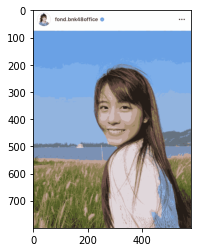

In [46]:
plt.imshow(new_img/255)

In [47]:
plt.imsave('img.jpg',new_img/255)

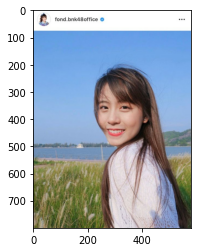

In [48]:
plt.imshow(RGB_img)